# Task 05: Temporal Planning and Reasoning

0. [Background](#star_wars)
1. [Temporal Plan Description](#temporal_plan_description)
    1. [Understand Temporal Plan Description](#text_description)
    2. [Draw Your Temporal Plan](#graphical_description)
       
2. [Simple Temporal Network](#stn)
    1. [Greedy Scheduling](#greedy)
    2. [Constraint Inference](#inference)
    3. [Constraint Inference from Shortest Path](#shortest_path)
    4. [Weighted Graph Representation](#weighted_graph)
    5. [Complete Floyd Warshall APSP](#apsp)

3. [Scheduling without Search](#no_search)
    1. [Solution by Decomposition](#decomposition)
    2. [Consistency Check](#consistent)
    3. [Flexible Execution](#flexible)
    
4. [Examples](#examples)
    1. [Video Examples](#video_examples)
    2. [Star Wars Example](#star_wars_example)
    3. [Flexible Execution Example](#flexible_execution)
    
5. [Reference](#reference) 

## <a name="star_wars"></a> Background

YOU are an engineer hired by the Generic Space Empire for a project. You have been assigned to a moon space station, the center of controversy through out the galaxy.

Maintenance personnel have noticed that several work stations have been acting up, but have assured the engineering team that “uh, everything’s perfectly all right now”. You, however, suspect something sinister afoot. Could it be sabotage from the Underdog Rebels?

You know that a document for the space station was recently stolen (many Non-Copyrighted Alien spies died), in which several attacks taking advantage of design flaws have been documented. Each attack requires compromising a combination of components, distributed across the workstations. 

While you can not dismantle the workstations to directly inspect the components, you can send a team of diagnosis droids to make observations on the workstations to exactly determine the faulty components. As you perform diagnosis on each workstation, you can update the odds on which type of attack will occur. You must do this in a timely manner, so that you can escape before an attack if necessary, and warn the Big Bad Guy Wearing Black if time permits. 

Let's check whether you have time to warn the Big Bad Guy Wearing Black, or whether you should just try to escape. Let's do this by first understanding timing constraints and checking feasibility, then providing a schedule for the plan! If not, we should understand why it is infeasible too! 

## <a name="temporal_plan_description"></a> Temporal Plan Description
Temporal plans may be described qualitatively when time points are encoded by interval relations. Specifically, the following descriptions are commonly used to describe temporal plans. Knowing how one events interact with another event will let us do the diagnosis, understand the attack and plan an escape! 


<div>
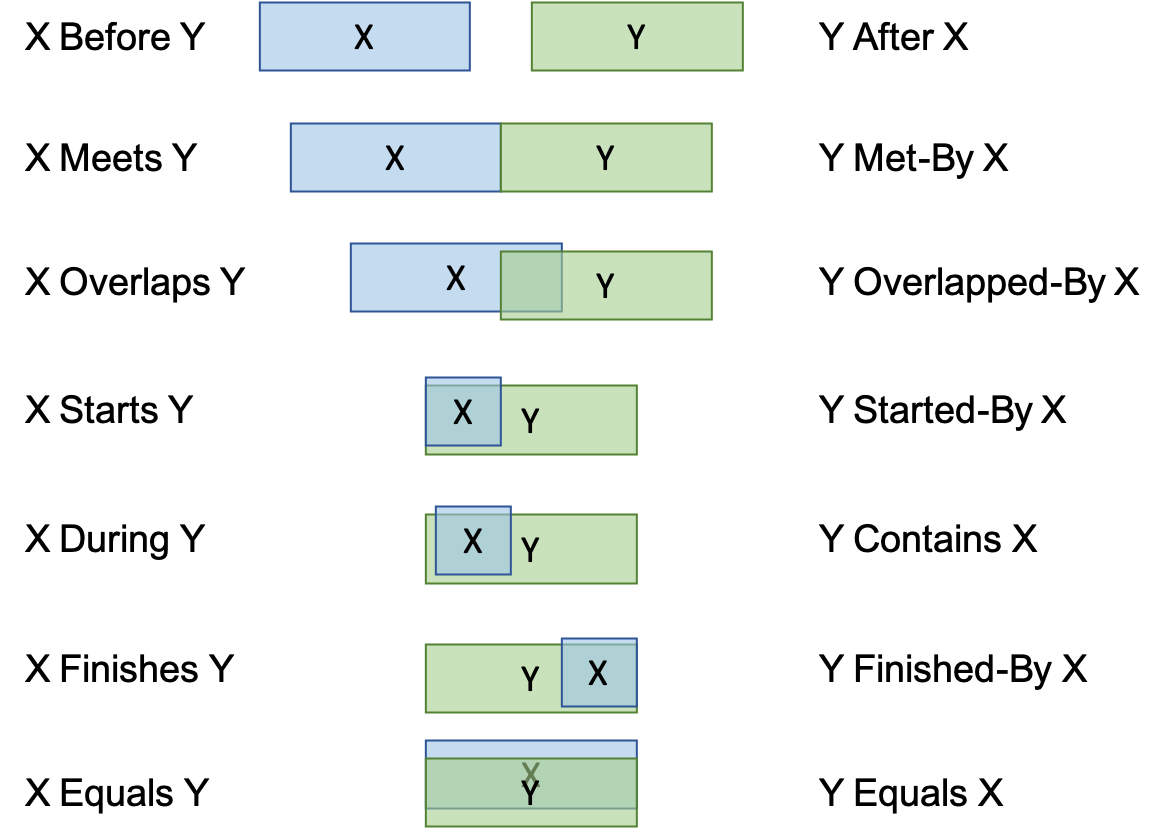
</div>

### <a name="text_description"></a> Understand Temporal Plan Description
Use the same set of descriptors to describe the following temporal graph. This will help us schedule the To-Do list given how each of the constraint with respect to each other. 

<div>
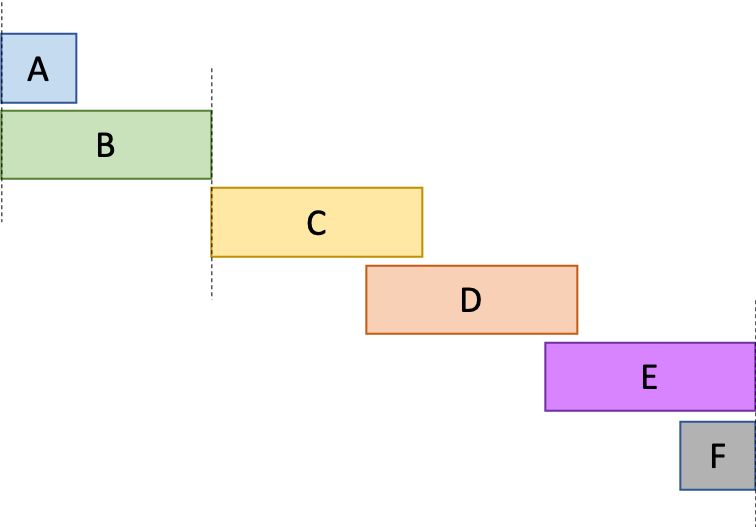
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

1. A starts B 
2. B meets C 
3. C overlaps D 
4. D overlaps E 
5. E finishes F 

### <a name="graphical_description"></a> Draw Your Temporal Plan
Now draw the temporal graphs given the following descriptions. In this case, we can assume that 

A = Diagnosis time

B = Observation period of Droids 

C = Read documentations

D = Update the odds 

E = Check on Big Bad Guy Wearing Black

In this case, the sequence would be

1. A Finishes B 
2. B Meets C 
3. D During C 
4. C Overlaps E 

Make sure the temporal graphs includes the above descriptions and only the above descriptions. No additional descriptions should be required to describe your temporal plan (before descriptors are ignored). 

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<div>
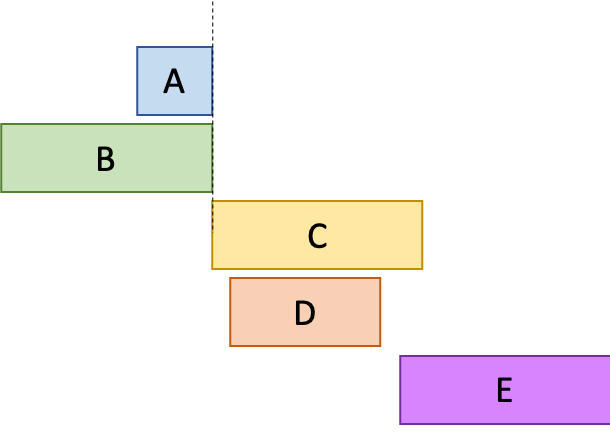
</div>

## <a name="stn"></a> Simple Temporal Network
Simple Temporal Network, abbreviated as STN, describes a set of time point nodes with edges mapping to temporal constraints. It encodes the binary constraints between any two time points. 

Specifically, we know that each task may take a range of time depending on its difficulty. Therefore, we should allow for a range of time points that are acceptable for this particular task. Along with the sequence, we can design this as a STN. 

### <a name="greedy"></a> Direct Greedy Scheduling
Given the following STN, schedule in order of node number. What happened? Is Direct Greedy scheduling a good idea? Why or why not? 

<div>
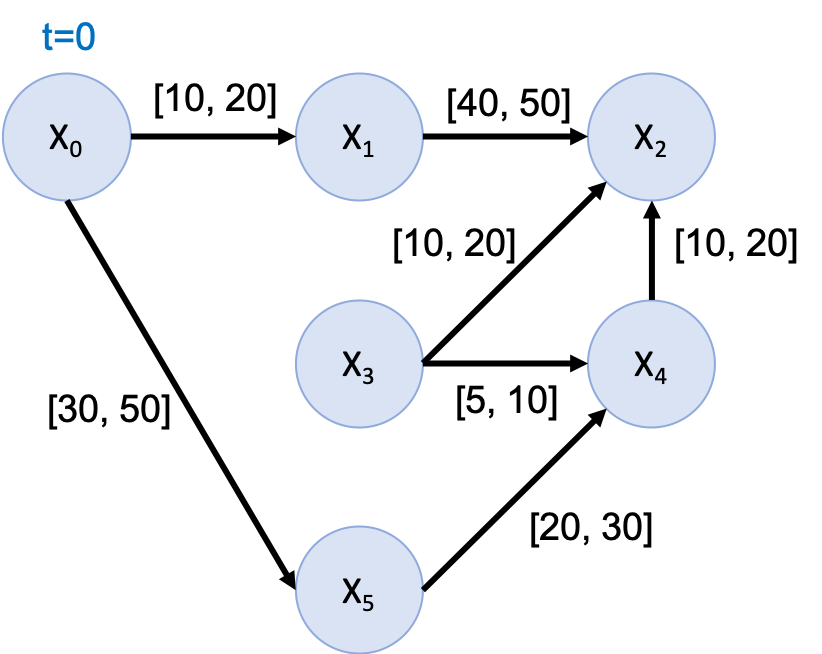
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

In this case, we would assign 
0. $X_0$ = 0 
1. $X_1$ = 20
2. $X_2$ = 70 
3. $X_3$ = 60 
4. $X_4$ = 60 
5. $X_5$ = 40

There exists a conflict from $X_3$ to $X_4$ as both would start at t = 60, but there should be t = [5,10] gap between the two. Direct Greedy Scheduling, in this case, yields invalid solution. That is, without adding inference to the constraint, it is easy to run into situations where assignments are invalid using Direct Greedy Scheduling. Therefore, Direct Greedy Scheduling is not ideal unless inferences have been explicitly explored (as below). 

### <a name="inference"></a> Constraint Inference
To better solve STN, it is important to impose implicit constraints of the network before solving using Greedy scheduling. The arithmetic rules for constraint inference is 

1. Addition 
\begin{equation}
[l_1, u_1] + [l_2, u_2] = [l_1+l_2, u_1+u_2] 
\end{equation}
2. Subtraction 
\begin{equation}
[l_1, u_1] - [l_2, u_2] = [l_1-u_2, u_1-l_2] 
\end{equation} 
3. Intersection 
\begin{equation} 
[l_1, u_1] \cap [l_2, u_2] = [\max(l_1, l_2), \min(u_1, u_2)] 
\end{equation} 

Using the rules above, assign the value of inferred constraint (lines in red) for the STN below. 

<div>
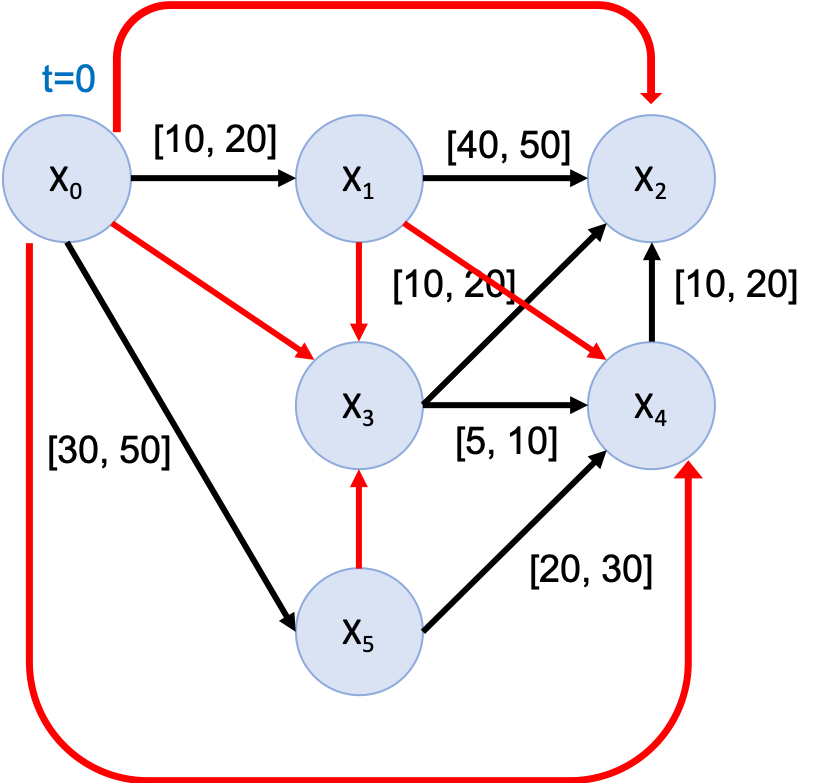
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<div>
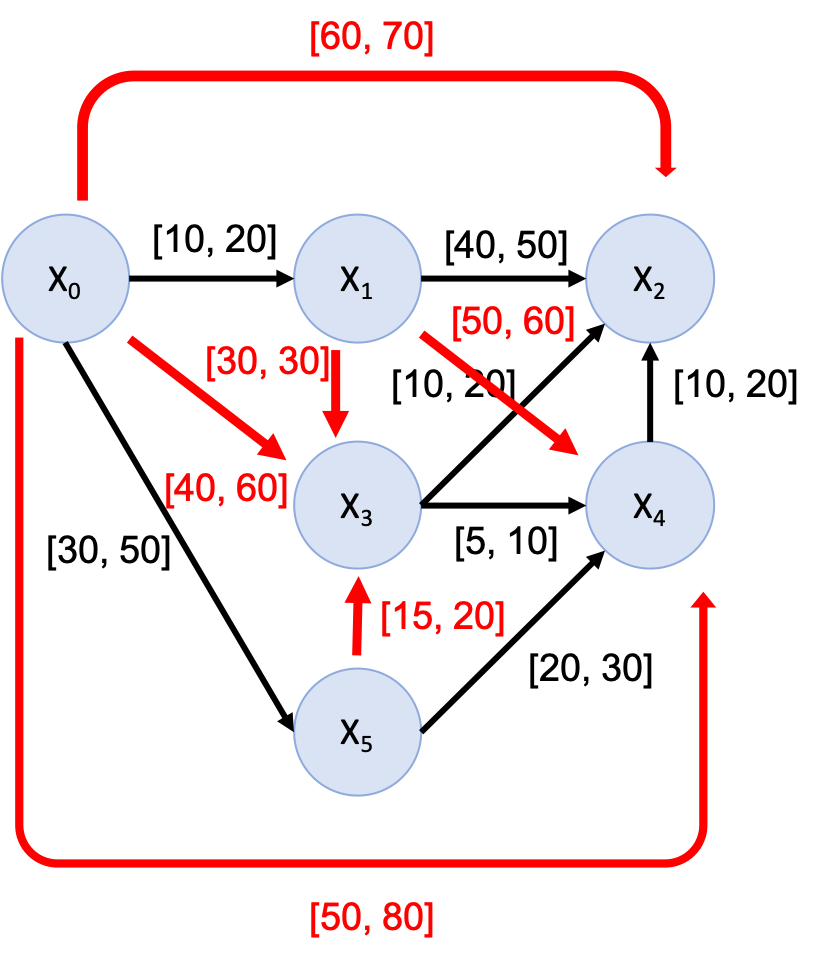
</div>

### <a name="shortest_path"></a> Constraint Inference from Shortest Path
So far, we have been treating STN as constraints. To draw efficient inference, an alternative way to look at constraint inference is to map STN to a weighted graph. In other words, knowing the range of time that a task can take, we can schedule a plan for our problem. 

The algorithm for the mapping is 
1. Upper bounds map to outgoing edges 
2. Lower bounds map to ingoing edges with weights negated 

An example of such conversion is as below 

<div>
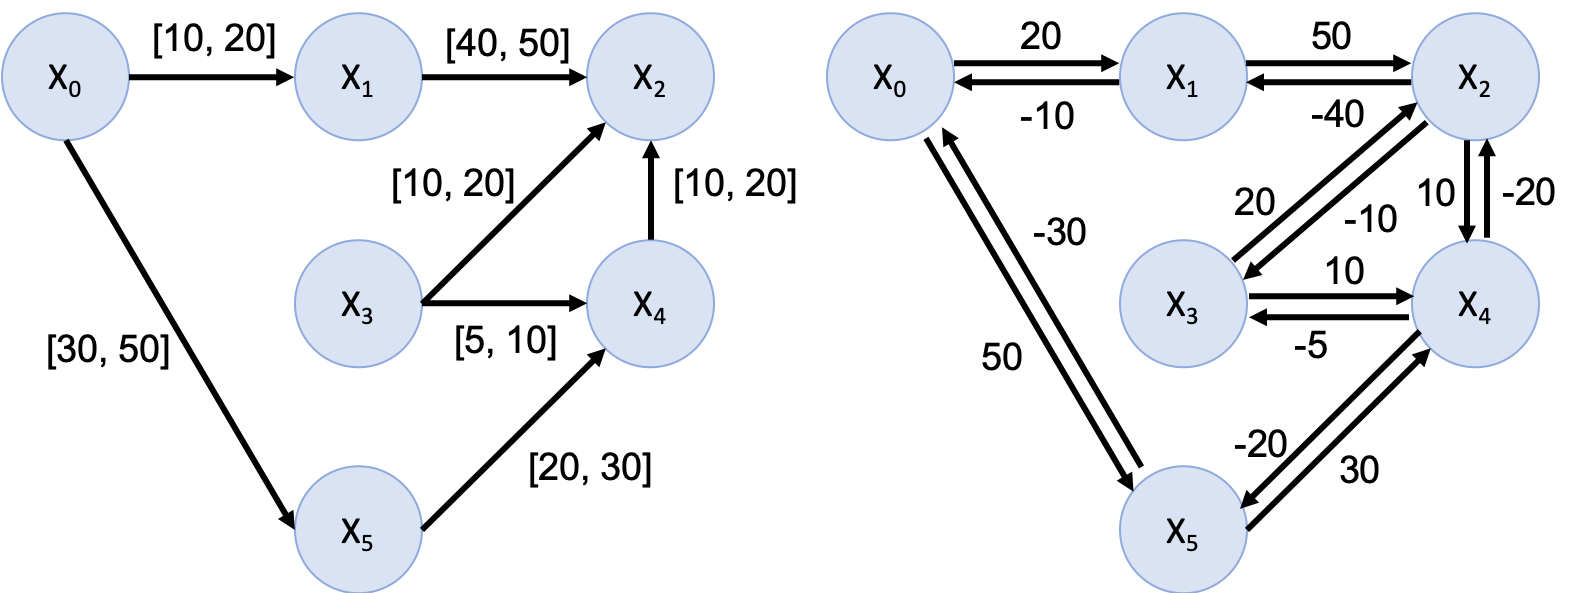
</div>

To efficiently compute shortest path, we can first place the result as adjacency matrix with weighted edges on the entries. Fill out the adjacency matrix below for the example above. 

<div>
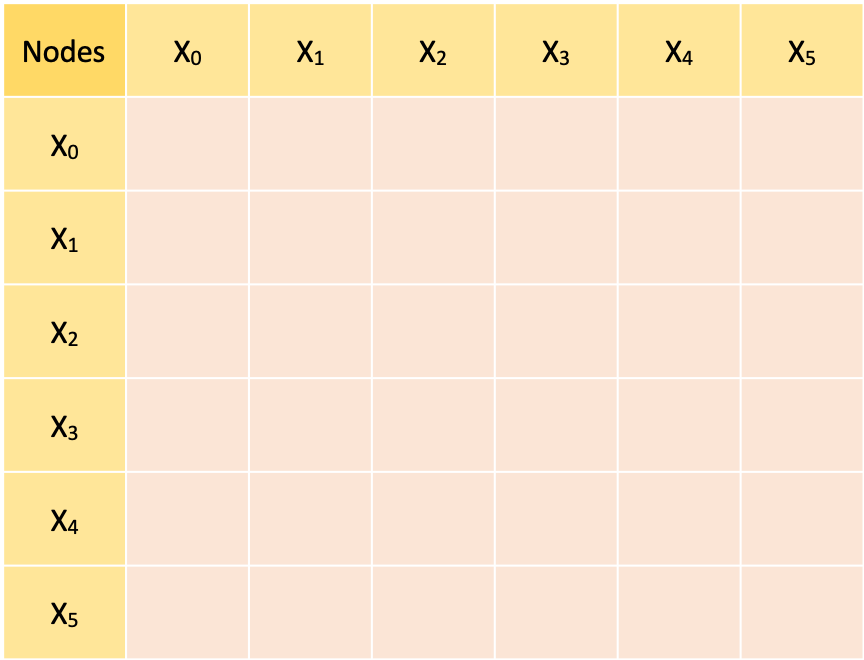
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<div>
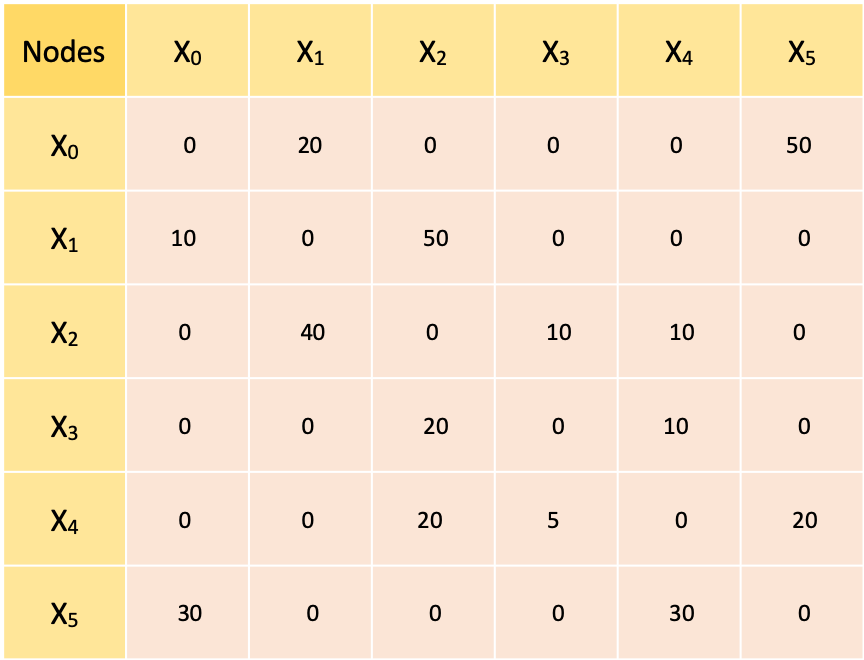
</div>

### <a name="graph"></a> Weighted Graph Representation 
In order to compute shortest paths in a graph, we need a simple graph representation. Fill in the graph class as defined below. 

In [1]:
import numpy as np

class WeightedGraph():
    '''
    Weighted Graph Class 
    May be initialized with an adjacency matrix [List of List]
    '''
    def __init__(self,adjacency_matrix=None):
        self.vertices = set()
        self.edges = set()
        if adjacency_matrix != None: 
            for cell1 in range(len(adjacency_matrix)): 
                for cell2 in range(len(adjacency_matrix[0])): 
                    self.add_vertex(cell1)
                    self.add_vertex(cell2)
                    weight = adjacency_matrix[cell1][cell2]
                    if weight != 0: 
                        self.add_edge(start, end, weight)
    
    def add_edge(self, start, end, weight): 
        self.edges.add((start, end, weight))
    
    def add_vertex(self, vertex):
        self.vertices.add(vertex)

In [2]:
def convert_weighted_graph(stn):
    '''
    Input: graph [Dictionary] - mapping nodeA to nodeB in [l, u] format
    Output: WeightedGraph instance ready for Floyd Warshall 
    '''
    graph = WeightedGraph()
    for n1, n2 in stn: 
        l, u = stn[(n1, n2)]
        
        graph.add_vertex(n1)
        graph.add_vertex(n2)
        graph.add_edge(n1, n2, u)
        graph.add_edge(n2, n1, -l)
    return graph 

### <a name="apsp"></a>  Floyd Warshall All Pairs Shortest Paths 
Use the WeightedGraph class to define the example above. Implement the Floyd Warshall All Pairs Shortest Paths (APSP) algorithm. Return a dictionary where key is the root and goal of the path and the value correspond to a tuple of the shortest path from root to goal and the path weight.

To calculate the shortest path between any two nodes your algorithm should do the following

- first initialize the distance of any node to itself as 0
- for every edge in the graph initialize the shortest path between the start & end nodes as the edges weight
- initialize all remaining distances as infinity
- incrementally tighten all bounds by checking if the path from a -> b -> c is shorter than the path a -> c for all nodes a, b and c

For a more in depth description of the algorithm see the video below.



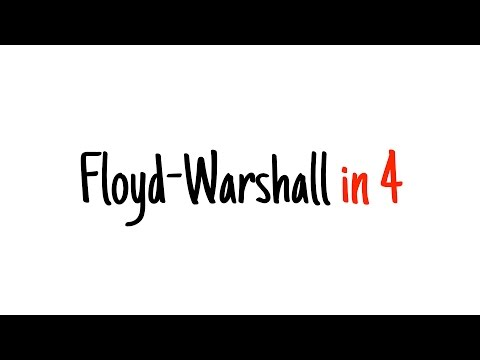

In [3]:
from IPython.display import YouTubeVideo
#HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/4OQeCuLYj-4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
#IFrame('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/4OQeCuLYj-4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>', width=560, height=315)
YouTubeVideo('4OQeCuLYj-4')

In [4]:
import itertools
def floyd_warshall(weighted_graph): 
    '''
    Input: weighted graph [WeightedGraph instance]
    Output: all pairs shortest paths [Dictionary - {(start, end): ([path], weight)}]
    '''
    #Initialize distance to self as zero
    paths = {(node, node):0 for node in weighted_graph.vertices}
    n = {(node,node):node for node in nodes}
    
    #Initialize distance as edge weight
    for edge in weighted_graph.edges:
        start, end, weight = edge
        paths[(start, end)] = weight
        n[(start, end)] = end
    
    #Initialize remaining distances as inf
    for i,j in itertools.product(list(weighted_graph.vertices), repeat=2):
        if (i,j) not in paths.keys():
            paths[(i,j)] = np.inf
        
    #Take minimum distance over all triangles
    for k,i,j in itertools.product(list(weighted_graph.vertices), repeat=3):
        if paths[(i,j)] > paths[(i,k)]+paths[(k,j)]:
            paths[(i,j)] = paths[(i,k)]+paths[(k,j)]        
            n[(i,j)] = n[i,k]
        if i == j and paths[(i,j)] < 0:
            break
    return(paths, n)

def path_reconstruction(start, end, n)
    path = [start]
    next_node = n(start,end)
    while next_node != end
        path.append(next_node)
        next_node = n[(next_node, end)]
    path.append(end)
    return(path)

## <a name="no_search"></a> Scheduling without Search
Incrementally tighten feasible intervals as committments are made. Using the diagram from Constraint Inference section, select a series of feasible intervals. Include every step of the algorithm to show your work. 

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Using the constraint inference, we can get the series of intervals and propagate as we assign values to each variable

1. $X_0$ = [0, 0], $X_1$ = [10, 20], $X_2$ = [60, 70], $X_3$ = [40, 60], $X_4$ = [50, 60], $X_5$ = [30, 50]
2. $X_0$ = 0, $X_1$ = [10, 20], $X_2$ = [60, 70], $X_3$ = [40, 60], $X_4$ = [50, 60], $X_5$ = [30, 50]
3. $X_0$ = 0, $X_1$ = 15, $X_2$ = [60, 65], $X_3$ = [40, 55], $X_4$ = [50, 55], $X_5$ = [30, 45] 
4. $X_0$ = 0, $X_1$ = 15, $X_2$ = 60, $X_3$ = [40, 50], $X_4$ = [50, 50], $X_5$ = [30, 40]
5. $X_0$ = 0, $X_1$ = 15, $X_2$ = 60, $X_3$ = 45, $X_4$ = 50, $X_5$ = [30, 30]
6. $X_0$ = 0, $X_1$ = 15, $X_2$ = 60, $X_3$ = 45, $X_4$ = 50, $X_5$ = 30

In 6 steps, we can find a feasiable solution to the problem. 

### <a name="consistent"></a> Consistency Check
Are the following networks consistent? Explain, for each network, why or why not? 

<div>
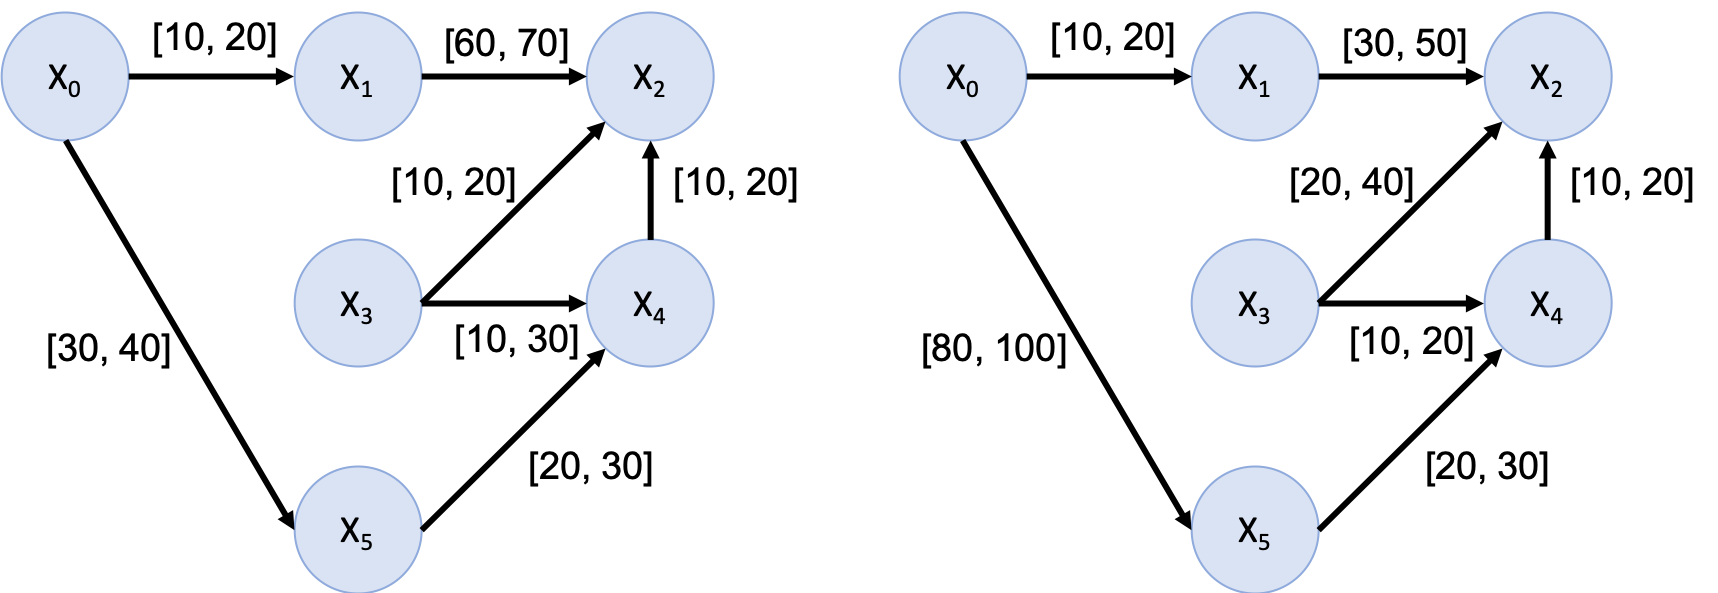
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<i>Answser:</i>


The first graph is consistent and can satisfied by the following schedule

- x<sub>0</sub> = 0; x<sub>1</sub> = 10; x<sub>2</sub> = 70; x<sub>3</sub> = 60; x<sub>4</sub> = 50; x<sub>5</sub> = 30

The second graph is inconsistent. Looking at the path (x<sub>0</sub>, x<sub>1</sub>, x<sub>2</sub>) 
it can be seen that x<sub>2</sub> must occur between [40,70]
However looking at the path (x<sub>0</sub>, x<sub>5</sub>, x<sub>4</sub>, x<sub>2</sub>) it can been seen that x<sub>2</sub> 
must occur between [110, 150]. Because there is no overlap between 
these ranges there is no time at which x<sub>2</sub> can be scheduled that will
satisfy all constraints.

Implement a consistency check function that determines if a STN, in the form of a weigthed graph, is consistent or not. 

In [5]:
def is_consistent(shortest_paths):
    '''
    Input: weighted graph [WeightedGraph instance]
    Output: consistency [Boolean]
    '''
    for (start, end), weight in shortest_paths.items():
        if start == end and weight < 0:
            return False
    return True

In [6]:
def convert_stn(shortest_paths):
    consistent = is_consistent(shortest_paths)
    if not consistent: 
        return None 
    else: 
        graph = {} 
        for n1, n2 in shortest_paths: 
            if shortest_paths[(n1, n2)] > 0 and shortest_paths[(n2, n1)] < 0: 
                graph[(n1, n2)] = [-shortest_paths[(n2, n1)], shortest_paths[(n1, n2)]]
            else:
                graph[(n2, n1)] = [-shortest_paths[(n1, n2)], shortest_paths[(n2, n1)]]
        return graph   

### <a name="PathReconstruction"></a> Scheduling
As shown above the Floyd Algorithm can take timing constraints and indicate whether a valid schedule is possible and if so return the shortest time two event can be scheduled relative to each other. The next step will be to extract the best schedule from the list of shortest paths.


In [7]:
from collections import defaultdict

def prop(node, time, graph, intervals):
    #Assigns node to execute at specified time, and then tightens all intervals
    intervals[node] = [time, time]
    for (start,end), [lower, upper] in graph.items():
        if node == start:
            intervals[end] = [max(intervals[end][0], time+lower), min(intervals[end][1], time+upper)]

        if node == end:
            intervals[start] = [max(intervals[start][0], time-upper), min(intervals[start][1], time-lower)]
  
    return(intervals)

def greedy_scheduling(graph, assignments = None, current_time = 0):
    if graph == None: return None 
    
    if assignments == None: assignments = {}
    nodes = set([x[0] for x in graph.keys()]+[x[1] for x in graph.keys()])
    
    #initialize all intervals at [0, infinity] assuming nodes cannot execute backwards in time.
    intervals = {node:[current_time, np.inf] for node in nodes}
    
    #propogate effects of previous assignments
    for node, time in assignments.items():
        intervals = prop(node, time, graph, intervals)
    
    #assign the minimum time to the last node to complete. This finds us the schedule which will execute in the minimum time
    (first_node,final_node), (low, high) = max(graph.items(), key = lambda x: x[1][0])
    intervals = prop(final_node, low, graph, intervals)
    assignments[final_node] = low
    
    intervals = prop(first_node, 0, graph, intervals)
    assignments[first_node] = 0
    
    #assign all remaining nodes in the middle of their interval to leave the most room for error and then propogate
    remaining_nodes = set(nodes) - set(assignments.keys())
    for node in remaining_nodes:
        assignments[node] = np.mean(np.mean(intervals[node]))
        intervals = prop(node, np.mean(intervals[node]), graph, intervals)
        
    return(assignments)

### <a name="flexible"></a> Flexible Execution
If $X_3$ is accidentally started at t=20, how many events are no longer valid? What does the new execution plan look like? 

<div>
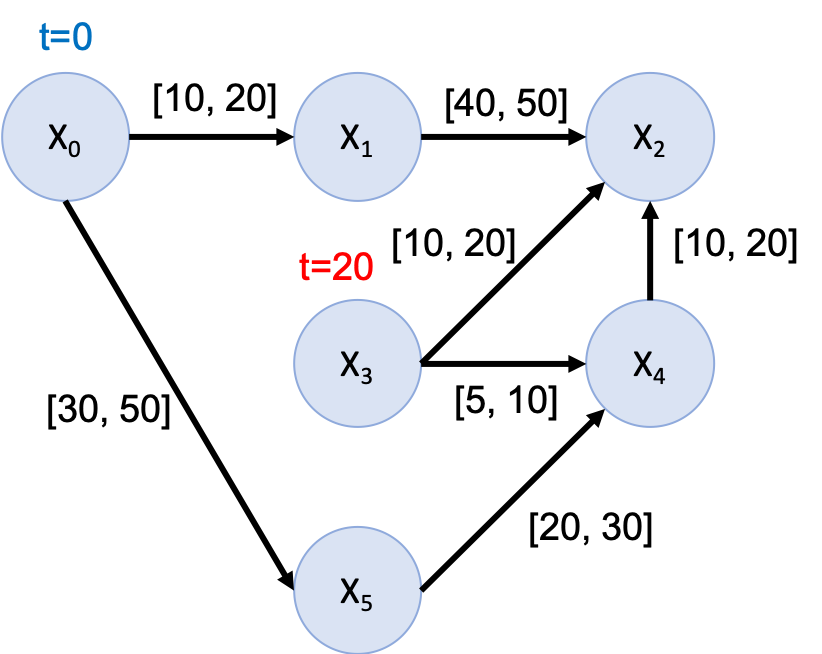
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

The two children of X<sub>3</sub> will now both be invalid. 
There is no time at which X<sub>2</sub> and X<sub>4</sub> can be scheduled that
will satify all constraints.


### <a name="FE Implementation"></a> Flexible Execution Implementation
Implement the reformulate plan and flexible execution functions.

Reformulate plan should take as input an accident that will occur during execution, a weighted graph of time constraints, and a scheduled plan and return as output a new valid plan after observing the error at time t or None if the constraints can no longer be satisfied.

Flexible execution should take a sequential list of accidents and return a list of updated plans as execution proceeds.


In [8]:
def reformulate_plan(graph, accident, scheduled_plan, current_time):
    '''
    Input: weighted_graph [WeightedGraph instance] 
           accident [tuple - (node, execution time)]
           scheduled plan [Dictionary - {node: execution time}]
    Output: new plan [Dictionary - {node: execution time}]
            time difference [Int]
    '''    
    #Initialize Intervals assuming vertex cannot be reached back in time
    intervals = defaultdict(lambda: [current_time, np.inf])
    assignments = {}
    
    for vertex, time in scheduled_plan.items():
        #propogate vertices which have already been reached
        if time < current_time and vertex != accident[0]:
            intervals = prop(vertex, time, graph, intervals)
            assignments[vertex] = time


    #Check if valid temporal plan is still possible
    if accident[1] < intervals[accident[0]][0] or accident[1] > intervals[accident[0]][1]:
        raise(Exception("Assignment Invalid: No valid plan possible"))
            
    else:
        #if possible add unplanned assignment
        assignments[accident[0]] = accident[1]
        intervals = prop(accident[0], time, graph, intervals)
        
    #use greedy search to formulate new plan 
    new_plan = greedy_scheduling(graph, assignments, current_time)
    return(new_plan)

## <a name="examples"></a> Examples

Given that we have implemented necessary functions to solve the temporal network constraints problem, we will go through the following example with our working code. These examples are also provided within the video explanation. 

### <a name="video_examples"></a> Video Examples 

These examples are provided within the video. In particular, graph1, ..., graph4 are provided below for reference. A shortest path and schedule is provided for each of the graphs if the graph constraints may be satisfied. If not, None is returned. 

<div>
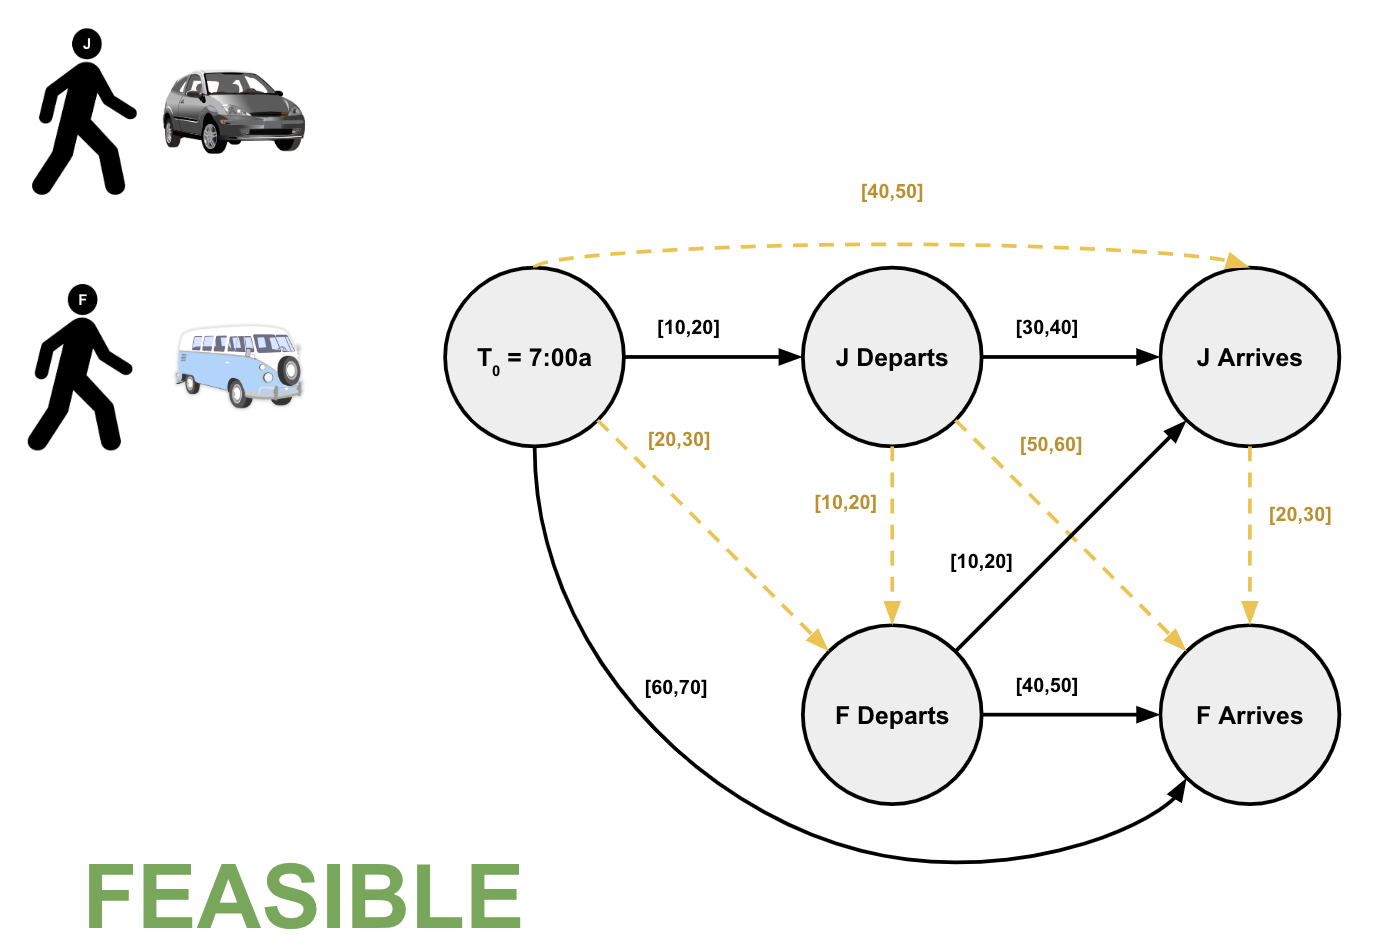
</div>

<div>
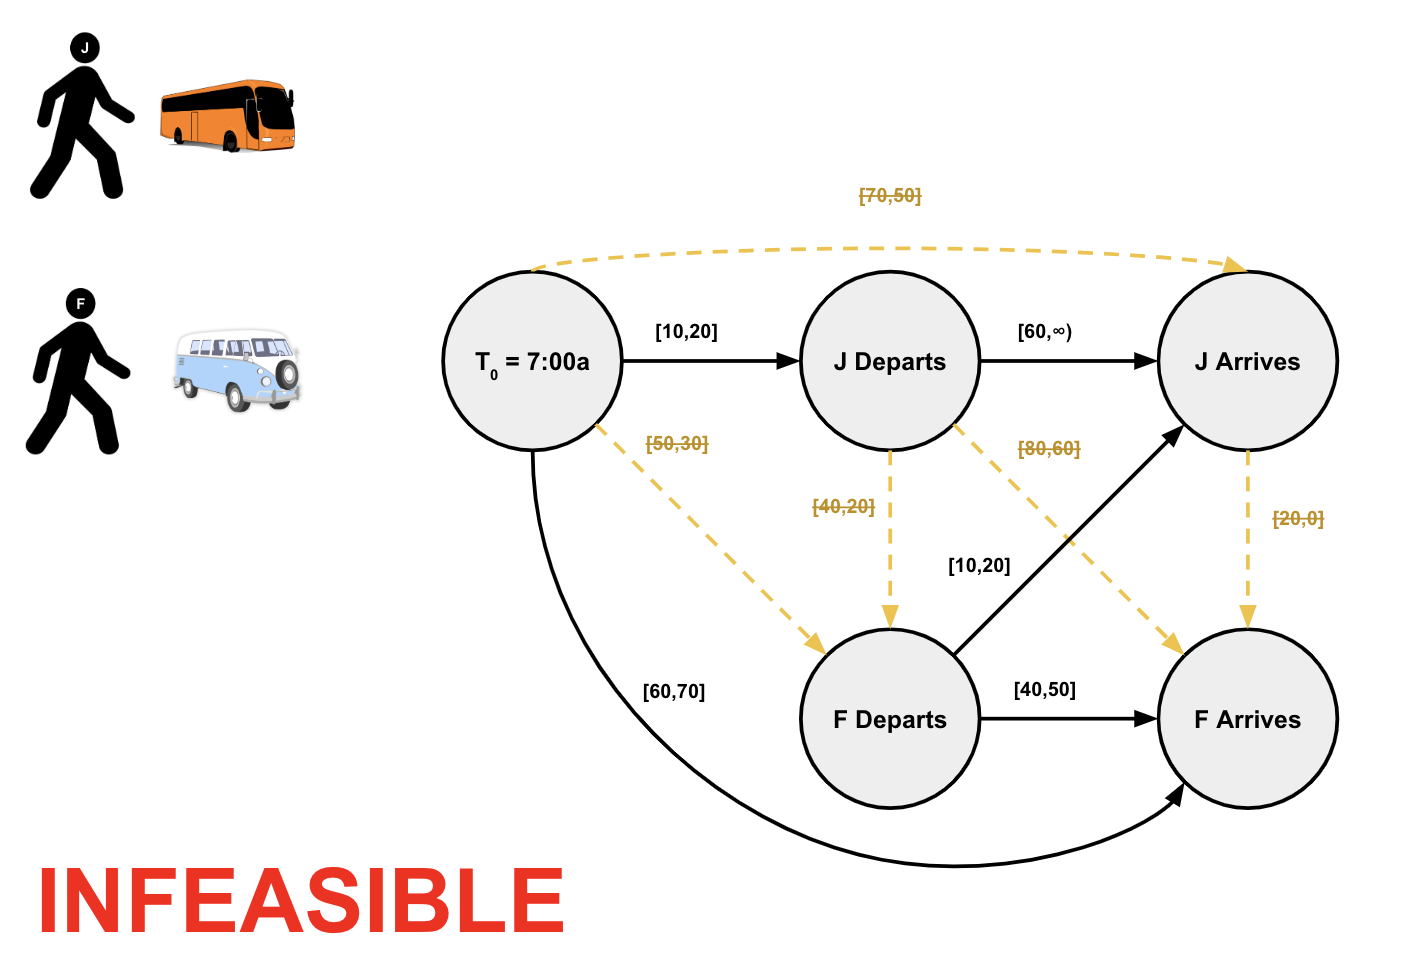
</div>

<div>
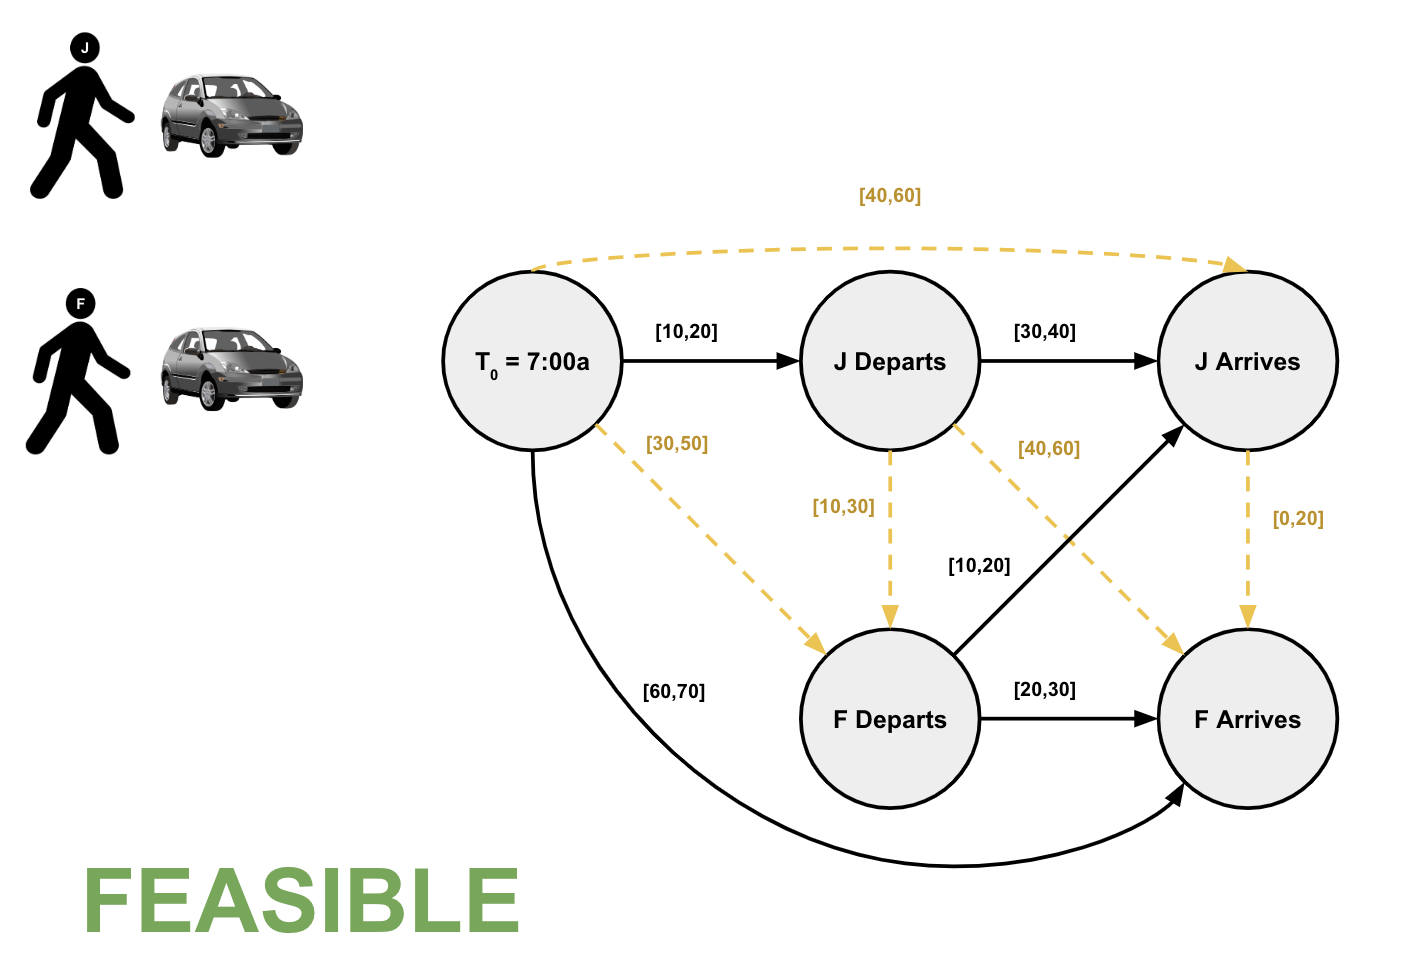
</div>

<div>
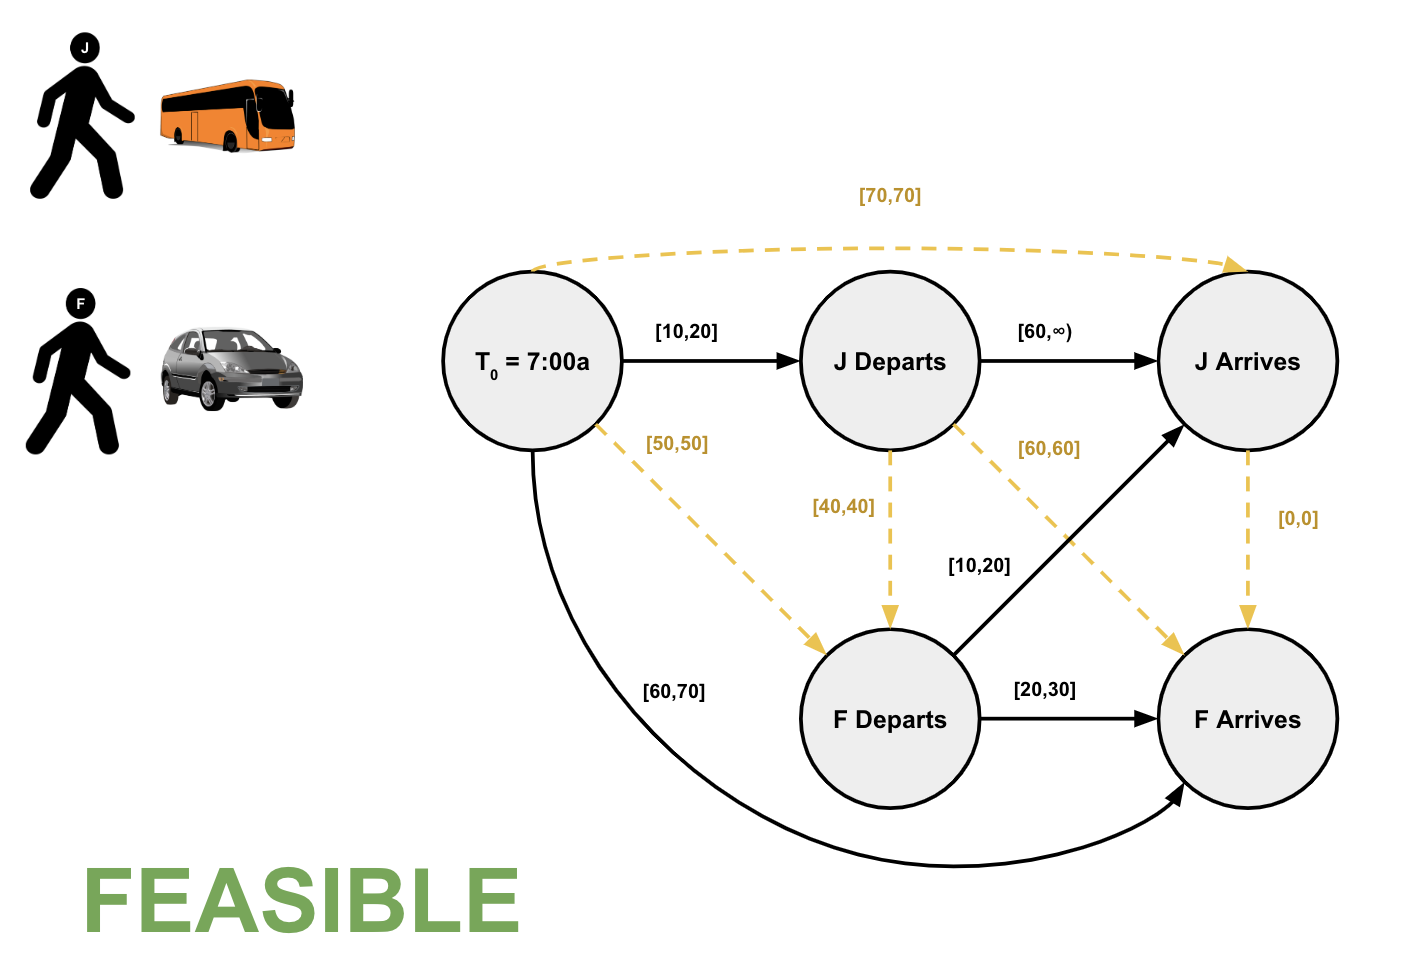
</div>

In [9]:
import unittest 

# Examples from Video
graph1 = {('T0', 'JD'): [10, 20], 
        ('JD', 'JA'): [30, 40], 
        ('FD', 'JA'): [10, 20], 
        ('FD', 'FA'): [40, 50], 
        ('T0', 'FA'): [60, 70]}
w_graph1 = convert_weighted_graph(graph1)
paths1 = floyd_warshall(w_graph1)
stn1 = convert_stn(paths1)
schedule1 = greedy_scheduling(stn1)

graph2 = {('T0', 'JD'): [10, 20], 
        ('JD', 'JA'): [60, np.inf], 
        ('FD', 'JA'): [10, 20], 
        ('FD', 'FA'): [40, 50], 
        ('T0', 'FA'): [60, 70]}
w_graph2 = convert_weighted_graph(graph2)
paths2 = floyd_warshall(w_graph2)
stn2 = convert_stn(paths2)
schedule2 = greedy_scheduling(stn2)

graph3 = {('T0', 'JD'): [10, 20], 
        ('JD', 'JA'): [30, 40], 
        ('FD', 'JA'): [10, 20], 
        ('FD', 'FA'): [20, 30], 
        ('T0', 'FA'): [60, 70]}
w_graph3 = convert_weighted_graph(graph3)
paths3 = floyd_warshall(w_graph3)
stn3 = convert_stn(paths3)
schedule3 = greedy_scheduling(stn3)

graph4 = {('T0', 'JD'): [10, 20], 
        ('JD', 'JA'): [60, np.inf], 
        ('FD', 'JA'): [10, 20], 
        ('FD', 'FA'): [20, 30], 
        ('T0', 'FA'): [60, 70]}
w_graph4 = convert_weighted_graph(graph4)
paths4 = floyd_warshall(w_graph4)
stn4 = convert_stn(paths4)
schedule4 = greedy_scheduling(stn4)

class TestTemporalNetwork(unittest.TestCase):

    def test_floyd_warshall(self):
        self.assertEqual(stn1[('T0', 'JA')], [40, 50])
        self.assertEqual(stn1[('T0', 'FD')], [20, 30])
        self.assertEqual(stn1[('JD', 'FD')], [10, 20])
        self.assertEqual(stn1[('JD', 'FA')], [50, 60])
        self.assertEqual(stn1[('JA', 'FA')], [20, 30])
        
        self.assertEqual(stn2, None)
        
        self.assertEqual(stn3[('T0', 'JA')], [40, 60])
        self.assertEqual(stn3[('T0', 'FD')], [30, 50])
        self.assertEqual(stn3[('JD', 'FD')], [10, 30])
        self.assertEqual(stn3[('JD', 'FA')], [40, 60])
        self.assertEqual(stn3[('JA', 'FA')], [0, 20])
        
        self.assertEqual(stn4[('T0', 'JA')], [70, 70])
        self.assertEqual(stn4[('T0', 'FD')], [50, 50])
        self.assertEqual(stn4[('JD', 'FD')], [40, 40])
        self.assertEqual(stn4[('JD', 'FA')], [60, 60])
        self.assertEqual(stn4[('JA', 'FA')], [0, 0])
        
    def test_consistent(self):
        self.assertTrue(is_consistent(paths1))
        self.assertTrue(is_consistent(paths3))
        self.assertTrue(is_consistent(paths4))
        
    def test_inconsistent(self): 
        self.assertFalse(is_consistent(paths2))
        
    def test_greedy_scheduling(self):
        def test_schedule(schedule, graph):
            for n1, n2 in graph: 
                self.assertTrue(schedule[n1] + graph[(n1, n2)][0] <= schedule[n2])
                self.assertTrue(schedule[n2] <= schedule[n1] + graph[(n1, n2)][1])
                
        test_schedule(schedule1, graph1)
        test_schedule(schedule3, graph3)
        test_schedule(schedule4, graph4)
        
    def test_invalid_greedy_scheduling(self):
        self.assertEqual(schedule2, None)

In [10]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


### <a name="star_wars_example"></a> Star Wars Example

Now, with our working code, we would like to make a plan to deal with the Bad Guy Wearing Black. Specifically, the scenario we have is given by this graph and its descriptions below

<div>
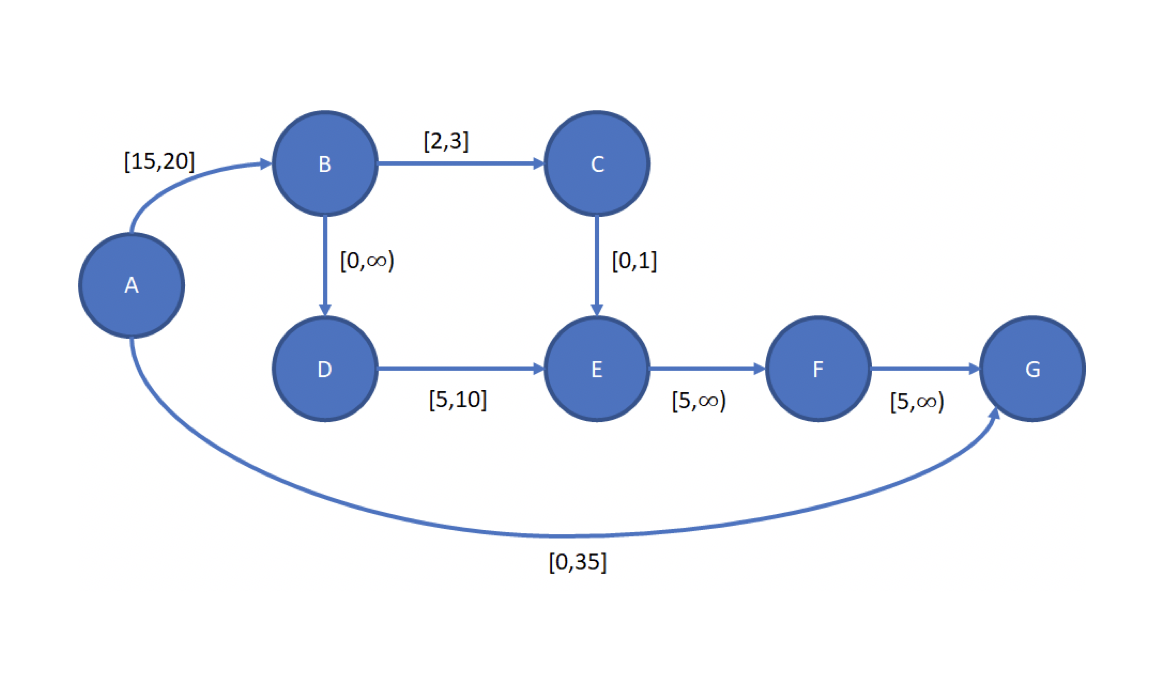
</div>

The events are as follows:
1. A: Departure of droids
2. B: Arrival of droids at the workstations
3. C: Droids done with analysis
4. D: You setting out to see Big Bad Guy Wearing Black
5. E: You presenting the analysis to Big Bad Guy Wearing Black
6. F: You departing for a shuttle off the space station
7. G: Launching your shuttle off the space station. 

The constraints are as follows:
1. AB: The droids take between 15 and 20 minutes to travel to the workstations
2. BC: Once at the stations, the droids take 2-3 minutes to analyse faults and upload the results 
3. BD: You set out to meet Big Bad Guy Wearing Black once you know the droids have arrived at the workstations
4. DE: You could get to where Big Bad Guy Wearing Black is quickly, but you're uneasy around him and his ancient religion. You can decide to take between 5 and 10 minutes for this trip
5. CE: Big Bad Guy Wearing Black only wants up-to-the-minute information - you can't present him analysis results which are more than 1 minute old. (And you can't present information before it's uploaded either.)
6. EF: The meeting takes at least 5 minutes, because Big Bad Guy Wearing Black finds your lack of faith disturbing.
7. FG: At the end of the meeting, you decide to save yourself. It takes you at least 5 minutes at a sprint to get to the shuttles. 
8. AG: IF there were an attack, you have up to 35 minutes to get away. 

In [11]:
# Star Wars Example
graph = {('A', 'B'): [15, 20], 
         ('B', 'C'): [2, 3], 
         ('B', 'D'): [0, np.inf], 
         ('C', 'E'): [0, 1], 
         ('D', 'E'): [5, 10], 
         ('E', 'F'): [5, np.inf], 
         ('F', 'G'): [5, np.inf], 
         ('A', 'G'): [0, 35]}
w_graph = convert_weighted_graph(graph)
paths = floyd_warshall(w_graph)
stn = convert_stn(paths)
schedule = greedy_scheduling(stn)

### <a name="star_wars_inputs"></a> Star Wars Inputs
1. Set of possible actions
2. Set of events
3. Temporal constraints

In [12]:
print ('The set of possible actions are', w_graph.edges)

The set of possible actions are {('E', 'C', 0), ('C', 'E', 1), ('E', 'D', -5), ('B', 'C', 3), ('A', 'B', 20), ('G', 'F', -5), ('F', 'G', inf), ('B', 'A', -15), ('F', 'E', -5), ('G', 'A', 0), ('C', 'B', -2), ('B', 'D', inf), ('D', 'E', 10), ('D', 'B', 0), ('A', 'G', 35), ('E', 'F', inf)}


In [13]:
print ('The set of events are', w_graph.vertices)

The set of events are {'E', 'G', 'A', 'F', 'C', 'D', 'B'}


In [14]:
print ('The set of temporal constraints are', graph)

The set of temporal constraints are {('A', 'B'): [15, 20], ('B', 'C'): [2, 3], ('B', 'D'): [0, inf], ('C', 'E'): [0, 1], ('D', 'E'): [5, 10], ('E', 'F'): [5, inf], ('F', 'G'): [5, inf], ('A', 'G'): [0, 35]}


### <a name="star_wars_outputs"></a> Star Wars Outputs
1. Feasibility?
2. Conflict if infeasible
3. Schedule if feasible
4. Best temporally feasible plan

In [15]:
print ('The feasibility is', is_consistent(paths))

The feasibility is False


In [16]:
print ('The conflict cycle can be found at', )

The conflict cycle can be found at


### <a name="flexible_execution"></a> Flexible Execution Example

In order to see the scheduling for a working example, we have selected one of the video examples to show the plan as well as how it dynamically handle accidents - our reformulate plan algorithm. 

As a recap, the constraints are given by the black lines and the shortest path algorithm finds the dotted yellow line

<div>
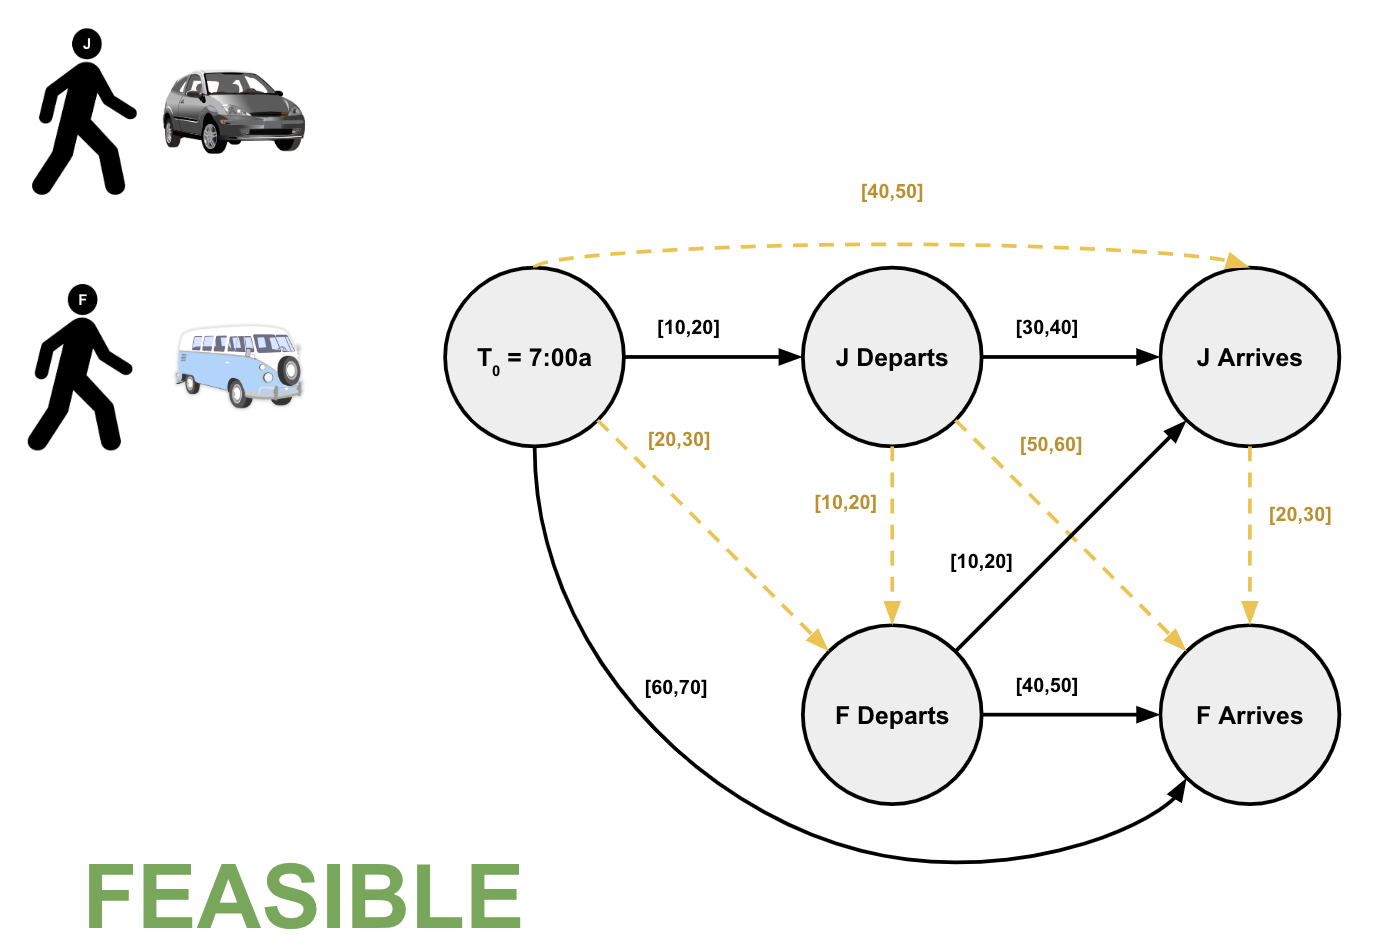
</div>

In [17]:
graph = {('T0', 'JD'): [10, 20], 
        ('JD', 'JA'): [30, 40], 
        ('FD', 'JA'): [10, 20], 
        ('FD', 'FA'): [40, 50], 
        ('T0', 'FA'): [60, 70]}
w_graph = convert_weighted_graph(graph)
paths = floyd_warshall(w_graph)
stn = convert_stn(paths)
schedule = greedy_scheduling(stn)

### <a name="flexible_execution_inputs"></a> Flexible Execution Inputs
1. Set of possible actions
2. Set of events
3. Temporal constraints

In [18]:
print ('The set of possible actions are', w_graph.edges)

The set of possible actions are {('FD', 'FA', 50), ('T0', 'FA', 70), ('JD', 'JA', 40), ('FA', 'T0', -60), ('FA', 'FD', -40), ('JA', 'FD', -10), ('JA', 'JD', -30), ('T0', 'JD', 20), ('FD', 'JA', 20), ('JD', 'T0', -10)}


In [19]:
print ('The set of events are', w_graph.vertices)

The set of events are {'FD', 'JA', 'T0', 'FA', 'JD'}


In [20]:
print ('The set of temporal constraints are', graph)

The set of temporal constraints are {('T0', 'JD'): [10, 20], ('JD', 'JA'): [30, 40], ('FD', 'JA'): [10, 20], ('FD', 'FA'): [40, 50], ('T0', 'FA'): [60, 70]}


### <a name="flexible_execution_outputs"></a> Flexible Execution Outputs
1. Feasibility?
2. Conflict if infeasible
3. Schedule if feasible
4. Best temporally feasible plan

In [21]:
print ('The feasibility is', is_consistent(paths))

The feasibility is True


In [22]:
print ('The possible shortest path is', stn)

The possible shortest path is {('FD', 'FD'): [0, 0], ('JA', 'JA'): [0, 0], ('T0', 'T0'): [0, 0], ('FA', 'FA'): [0, 0], ('JD', 'JD'): [0, 0], ('FD', 'FA'): [40, 50], ('T0', 'FA'): [60, 70], ('JD', 'JA'): [30, 40], ('FD', 'JA'): [10, 20], ('T0', 'JD'): [10, 20], ('T0', 'FD'): [20, 30], ('JD', 'FD'): [10, 20], ('T0', 'JA'): [40, 50], ('JA', 'FA'): [20, 30], ('JD', 'FA'): [50, 60]}


In [23]:
print ('Greedy scheduling / best temporally feasible plan is', schedule)

Greedy scheduling / best temporally feasible plan is {'FA': 60, 'T0': 0, 'FD': 20.0, 'JD': 10.0, 'JA': 40.0}


### <a name="flexible_execution_in_action"></a> Flexible Execution in Action

Now, what if an accident happened and JD gets executed at t=20. What should we do? We can reformulate a new plan based on this accident! 

In [24]:
new_plan = reformulate_plan(stn, ('JD', 20), schedule, 20)

In [25]:
print ('The new plan now looks like', new_plan)

The new plan now looks like {'T0': 0, 'JD': 20, 'FA': 60, 'FD': 25.0, 'JA': 45.0}


## <a name="reference"></a> Reference

The paper that is used to create this tutorial is 
Dechter, Rina, et al. “Temporal Constraint Networks.” Artificial Intelligence, Elsevier, 19 Feb. 2003, www.sciencedirect.com/science/article/pii/0004370291900066.